In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/transformers/2b/2/model.safetensors.index.json
/kaggle/input/gemma/transformers/2b/2/gemma-2b.gguf
/kaggle/input/gemma/transformers/2b/2/config.json
/kaggle/input/gemma/transformers/2b/2/model-00001-of-00002.safetensors
/kaggle/input/gemma/transformers/2b/2/model-00002-of-00002.safetensors
/kaggle/input/gemma/transformers/2b/2/tokenizer.json
/kaggle/input/gemma/transformers/2b/2/tokenizer_config.json
/kaggle/input/gemma/transformers/2b/2/special_tokens_map.json
/kaggle/input/gemma/transformers/2b/2/.gitattributes
/kaggle/input/gemma/transformers/2b/2/tokenizer.model
/kaggle/input/gemma/transformers/2b/2/generation_config.json
/kaggle/input/finetned-gemma-model-for-sql-injection/transformers/default/1/adapter_model.safetensors
/kaggle/input/finetned-gemma-model-for-sql-injection/transformers/default/1/adapter_config.json
/kaggle/input/finetned-gemma-model-for-sql-injection/transformers/default/1/README.md
/kaggle/input/dataset/Modified_SQL_Dataset.csv
/kaggle/input/g

In [2]:
orignal_data = pd.read_csv("/kaggle/input/dataset/Modified_SQL_Dataset.csv")

In [3]:
orignal_data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [4]:
df = orignal_data.copy()

In [5]:
df.head()


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


In [7]:
label_counts = df['Label'].value_counts()
label_counts

Label
0    19537
1    11382
Name: count, dtype: int64

<Axes: xlabel='Label'>

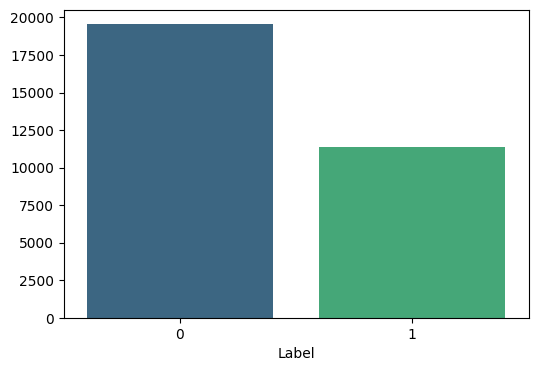

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.barplot(x= label_counts.index, y=label_counts.values, palette="viridis")

In [9]:
unique_queries = df['Query'].nunique()

df['Query_Length'] = df['Query'].apply(len)

top_queries = df['Query'].value_counts().head(10)



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


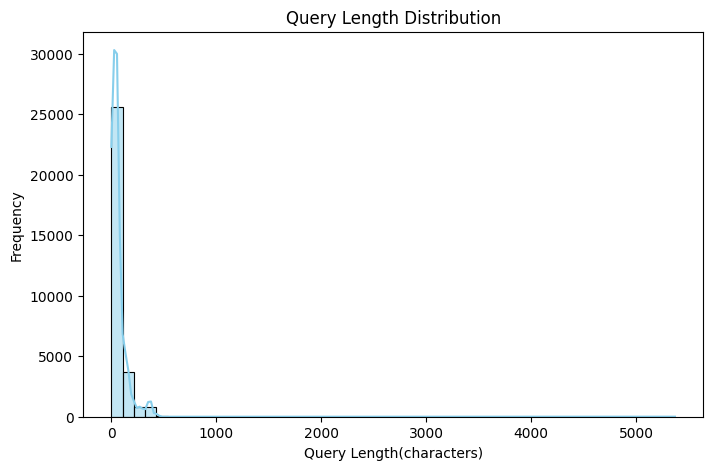

In [10]:
plt.figure(figsize = (8, 5))
sns.histplot(df['Query_Length'], bins = 50, kde = True, color = 'skyblue')
plt.title('Query Length Distribution')
plt.xlabel('Query Length(characters)')
plt.ylabel('Frequency')
plt.show()

In [11]:
top_queries

Query
#NAME?                                                                         8
1                                                                              2
1860000000000000                                                               2
7750000000000000                                                               2
28%                                                                            2
29%                                                                            2
26%                                                                            2
1940000000000000                                                               2
  SELECT * FROM pressure WHERE affect NOT IN  ( 'hair', 'shop', 'labor' )      1
SELECT * FROM building WHERE saw IN  ( SELECT general FROM lift )              1
Name: count, dtype: int64

In [12]:
invalid_entries = ['#NAME?', '1', '26%', '28%', '29%', '1860000000000000', '7750000000000000', '1940000000000000']
df = df[~df['Query'].isin(invalid_entries)]

In [13]:
df.head()

,Query,Label,Query_Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
1,create user name identified by pass123 tempora...,1,90
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85


In [14]:
Q1 = df['Query_Length'].quantile(0.25)
Q3 = df['Query_Length'].quantile(0.75)

IQR = Q3-Q1

max_length = Q3 + 1.5 * IQR
print(max_length)

171.0


In [15]:
df = df[df['Query_Length'] <= max_length]
df.head()

,Query,Label,Query_Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
1,create user name identified by pass123 tempora...,1,90
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = ...,1,109


In [16]:
df['Query'] = df['Query'].str.lower().str.strip()

In [17]:
df.head()

,Query,Label,Query_Length
0,""" or pg_sleep ( __time__ ) --",1,33
1,create user name identified by pass123 tempora...,1,90
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = (...,1,109


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28516 entries, 0 to 30918
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Query         28516 non-null  object
 1   Label         28516 non-null  int64 
 2   Query_Length  28516 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 891.1+ KB


In [19]:
positive_samples = df[df['Label'] == 1]
negative_samples = df[df['Label'] == 0]

negative_samples = negative_samples.sample(n=9081, random_state=42)

In [20]:
df = pd.concat([negative_samples, positive_samples])

In [21]:
df = df.reset_index(drop=True)

In [22]:
df.drop(['Query_Length'], axis = 1, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   18162 non-null  object
 1   Label   18162 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 283.9+ KB


In [24]:
df.to_csv('Cleaned_Balanced_SQL_Dataset.csv', index=False)

In [25]:
import json

df = pd.read_csv('/kaggle/working/Cleaned_Balanced_SQL_Dataset.csv')

In [26]:
df.head()

,Query,Label
0,select option_value from wp_options where opti...,0
1,select bend,0
2,select * from gentle where lose = 'cut' limit 3,0
3,select * from very where fresh between 10 and 20,0
4,select * from post,0


In [27]:
import json

df['Query'] = df['Query'].astype(str)

output_file = 'output_dataset.jsonl'
with open(output_file, 'w', encoding='utf-8') as f:
    for record in df.to_dict(orient='records'):
        f.write(json.dumps(record, ensure_ascii=False) + '\n')



In [28]:
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install torch 
!pip install peft 
!pip install bitsandbytes 
!pip install evaluate 
!pip install datasets 
!pip install accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [29]:
import torch
import pandas as pd
from datasets import Dataset, load_dataset
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training, get_peft_model
from transformers import (
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback,
    DataCollatorWithPadding)

import bitsandbytes as bnb

import evaluate
import numpy as np

import random

In [30]:
dataset = load_dataset('json', data_files = '/kaggle/working/output_dataset.jsonl')
dataset = dataset['train'].train_test_split(test_size = 0.1)

Generating train split: 0 examples [00:00, ? examples/s]

In [31]:
model_name = '/kaggle/input/gemma-2/transformers/gemma-2-2b/2'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [32]:
def preprocess(batch):
    return tokenizer(batch['Query'], truncation = True)

In [33]:
tokenized_data = dataset.map(preprocess, batched = True)

Map:   0%|          | 0/16345 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1817 [00:00<?, ? examples/s]

In [34]:
id2label = {0: "SAFE", 1: "MALICIOUS"}
label2id = {"SAFE": 0, "MALICIOUS": 1}

In [35]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [36]:
metric = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1) 
    return metric.compute(predictions=predictions, references=labels)

In [37]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [38]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,  
    num_labels=2,  
    id2label=id2label,  
    label2id=label2id,  
    quantization_config=bnb_config,  
    device_map="auto" 
)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/gemma-2/transformers/gemma-2-2b/2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
model.gradient_checkpointing_enable()

In [40]:
model = prepare_model_for_kbit_training(model)

In [41]:
def find_linear_names(model):
    """
    This function identifies all linear layer names within a model that use 4-bit quantization.
    Args:
        model (torch.nn.Module): The PyTorch model to inspect.
    Returns:
        list: A list containing the names of all identified linear layers with 4-bit quantization.
    """
    cls = bnb.nn.Linear4bit  

   
    lora_module_names = set()

    for name, module in model.named_modules():
        if isinstance(module, cls):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])

        if 'lm_head' in lora_module_names: 
            lora_module_names.remove('lm_head')
    return list(lora_module_names)


modules = find_linear_names(model)
print(modules)


['o_proj', 'k_proj', 'q_proj', 'up_proj', 'down_proj', 'v_proj', 'gate_proj']


In [42]:
lora_config = LoraConfig(
    r=32,  
    lora_alpha=32, 
    target_modules=modules,
    lora_dropout=0.05,  
    bias="none",  
    task_type="SEQ_CLS" 
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

trainable params: 41,538,048 || all params: 2,655,884,544 || trainable%: 1.5640


In [43]:
training_args = TrainingArguments(
    output_dir="epoch_weights", 
    learning_rate=2e-5,  
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=8,   
    num_train_epochs=2,  
    weight_decay=0.01,  
    evaluation_strategy='epoch', 
    save_strategy="epoch",  
    load_best_model_at_end=True,  
    push_to_hub=False,   
    report_to="none",  
    metric_for_best_model='eval_loss')  

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1609: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
early_stop = EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=.0)

In [45]:

if "Label" in tokenized_data["train"].column_names:
    tokenized_data["train"] = tokenized_data["train"].rename_column("Label", "labels")
    tokenized_data["test"] = tokenized_data["test"].rename_column("Label", "labels")


In [46]:
trainer = Trainer(
    model=model, 
    args=training_args,  
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"], 
    tokenizer=tokenizer,
    data_collator=data_collator,  
    compute_metrics=compute_metrics, 
    callbacks=[early_stop] 
)

trainer.train()

<ipython-input-46-cf687cc96e53>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [47]:
new_model = "Finetuned_Gemma_Model"

# Save the model
trainer.model.save_pretrained(new_model)

# Save the tokenizer
tokenizer.save_pretrained(new_model)

print("Model and tokenizer saved successfully!")

Model and tokenizer saved successfully!


In [54]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer


model_path = "/kaggle/working/Finetuned_Gemma_Model"


model = AutoModelForSequenceClassification.from_pretrained(model_path)


tokenizer = AutoTokenizer.from_pretrained(model_path)

print("Model and tokenizer loaded successfully!")


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/gemma-2/transformers/gemma-2-2b/2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully!


Map:   0%|          | 0/1817 [00:00<?, ? examples/s]

Accuracy: 0.5867
Precision: 0.5987
Recall: 0.5867
F1-score: 0.5666

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.79      0.66       932
           1       0.63      0.37      0.46       885

    accuracy                           0.59      1817
   macro avg       0.60      0.58      0.56      1817
weighted avg       0.60      0.59      0.57      1817



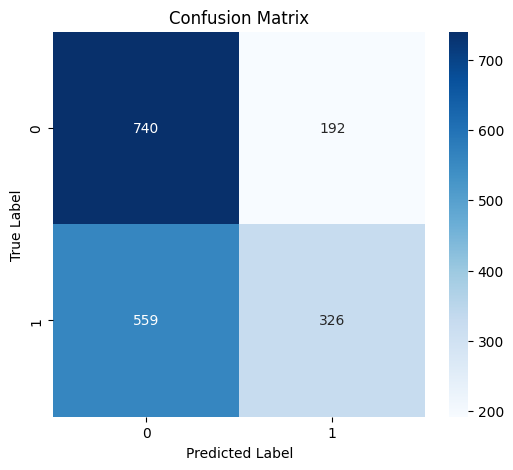

In [57]:
import torch
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

model.eval()


if "label" not in test_data.column_names and "labels" in test_data.column_names:
    test_data = test_data.rename_column("labels", "label")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

if device.type == "cuda":
    model.half()

def tokenize_fn(example):
    return tokenizer(example["Query"],  
                    truncation=True, 
                    padding="max_length", 
                    max_length=128)

test_data = test_data.remove_columns(["input_ids", "attention_mask"])

test_data = test_data.map(tokenize_fn, batched=True, batch_size=16)

def predict(batch):
    inputs = {
        "input_ids": torch.tensor(batch["input_ids"], dtype=torch.long).to(device),
        "attention_mask": torch.tensor(batch["attention_mask"]).to(device)
    }

    if device.type == "cuda":
        inputs["attention_mask"] = inputs["attention_mask"].half()

    with torch.no_grad():
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy().tolist()

    torch.cuda.empty_cache()
    gc.collect()
    
    return preds

predictions = []
for i in range(0, len(test_data), batch_size):
    batch = test_data.select(range(i, min(i + batch_size, len(test_data))))
    batch_preds = predict(batch) 
    predictions.extend(batch_preds)

test_data = test_data.add_column("predicted_label", predictions)


true_labels = test_data["label"]
pred_labels = predictions 


accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average="weighted")


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(true_labels, pred_labels))

conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(true_labels), yticklabels=set(true_labels))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
